# <center>**EDA - Consumidor.gov.br**</center>

Projeto de Análise Exploratória de Dados dos registros de reclamações de consumidores brasileiros, sobre um produto ou serviço adquirido, feitas no portal Consumidor.gov.br no ano de 2019. O serviço é oferecido pela Secretaria Nacional do Consumidor, do Ministério da Justiça, e os dados são abertos e disponibilizados  no site <a href="http://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1">Dados.gov.br</a>.

# ***Importação das bibliotecas***

In [1]:
# Executar se a biblioteca Unicode não estiver instalada
!pip install unidecode

     |████████████████████████████████| 245kB 8.7MB/s 


In [2]:
from unidecode import unidecode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import plugins

# ***Importação dos dados***

## ***Dataset do site consumidor.gov.br***

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Diretório dos arquivos dataset
semestre1 = '/content/drive/MyDrive/Colab Notebooks/Datasets/Consumidor_2019/2019-1-semestre.csv'
semestre2 = '/content/drive/MyDrive/Colab Notebooks/Datasets/Consumidor_2019/2019-2-semestre.csv'

In [5]:
# Leitura do dataset com os dados do primeiro semestre de 2019
dados_consumidor = pd.read_csv(semestre1, sep=';', encoding='utf-8', parse_dates=['Data Finalização'])

In [6]:
# Leitura do dataset com os dados do segundo semestre de 2019
dados_consumidor = pd.concat([dados_consumidor, 
                              pd.read_csv(semestre2, sep=';', encoding='latin1', parse_dates=['Data Finalização'])])

In [7]:
# Resetando os valores do index
dados_consumidor.reset_index(drop=True)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Francisco Morato,M,entre 21 a 30 anos,2019-04-01,10.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,S,RS,Porto Alegre,F,entre 61 a 70 anos,2019-01-01,10.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Atendimento / SAC,Dificuldade de contato / demora no atendimento,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,SP,São Vicente,F,entre 41 a 50 anos,2019-03-01,9.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,NE,PE,Paulista,M,entre 31 a 40 anos,2019-02-01,10.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Contrato / Oferta,Dificuldade para contratar / recusa injustificada,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,SE,SP,São Bernardo do Campo,F,entre 31 a 40 anos,2019-02-01,7.0,Banco Itaú Unibanco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado (Empréstimo descontado em f...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780174,SE,SP,São Paulo,M,entre 31 a 40 anos,2019-12-20,3.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança após cancelamento do serviço,Telefone,S,S,Finalizada avaliada,Não Resolvida,1.0,1
780175,SE,SP,São Paulo,F,entre 31 a 40 anos,2019-12-27,3.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,"Negativação indevida (SPC, Serasa, SCPC etc)",Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
780176,SE,RJ,São João de Meriti,F,entre 61 a 70 anos,2019-12-21,2.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
780177,SE,SP,Rio Claro,M,entre 21 a 30 anos,2019-12-27,7.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,N,S,Finalizada avaliada,Resolvida,5.0,1


In [8]:
dados_consumidor.dtypes

Região                            object
UF                                object
Cidade                            object
Sexo                              object
Faixa Etária                      object
Data Finalização          datetime64[ns]
Tempo Resposta                   float64
Nome Fantasia                     object
Segmento de Mercado               object
Área                              object
Assunto                           object
Grupo Problema                    object
Problema                          object
Como Comprou Contratou            object
Procurou Empresa                  object
Respondida                        object
Situação                          object
Avaliação Reclamação              object
Nota do Consumidor               float64
Total                              int64
dtype: object

In [9]:
dados_consumidor.drop('Total', axis=1, inplace=True)

In [10]:
dados_consumidor.isnull().sum()

Região                         0
UF                             0
Cidade                         0
Sexo                           0
Faixa Etária                   0
Data Finalização               0
Tempo Resposta              8425
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação           0
Nota do Consumidor        342563
dtype: int64

In [11]:
dados_consumidor.fillna(0, inplace = True)

# ***EDA - Avaliação de Hipóteses***

## ***Há predominância de algum sexo nas reclamações?***

In [12]:
sexo = dados_consumidor['Sexo'].value_counts()

In [13]:
print('Quantidade de reclamações por sexo:\nMasculino - ' + str(sexo[0]) + '\nFeminino - ' + str(sexo[1]))

Quantidade de reclamações por sexo:
Masculino - 450794
Feminino - 329385


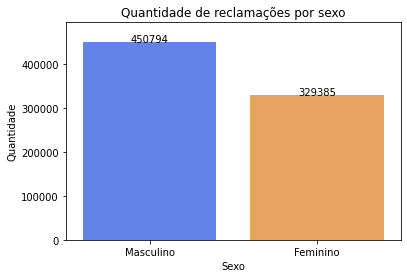

In [14]:
# Gerando o gráfico
sns.barplot(x=sexo.index, y = sexo, alpha=0.7, palette='bright')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Sexo')
ax.set_xticklabels(['Masculino', 'Feminino'])
ax.set_ylabel(ylabel='Quantidade')
ax.set_title(label='Quantidade de reclamações por sexo')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
y_max =sexo.max() * 1.1
ax.set_ylim([0, y_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center')
# Exibindo o gráfico
plt.show()

## ***Há predominância de faixa etária nas reclamações?***

In [15]:
faixa_etaria = dados_consumidor['Faixa Etária'].value_counts()
ordem_faixa_etaria = ['até 20 anos', 'entre 21 a 30 anos', 'entre 31 a 40 anos', 'entre 41 a 50 anos', 'entre 51 a 60 anos', 
                      'entre 61 a 70 anos', 'mais de 70 anos']
faixa_etaria = faixa_etaria.loc[ordem_faixa_etaria]

In [16]:
print('Quantidade de reclamações por Faixa Etária:')
print(faixa_etaria)

Quantidade de reclamações por Faixa Etária:
até 20 anos            16345
entre 21 a 30 anos    223147
entre 31 a 40 anos    257398
entre 41 a 50 anos    126095
entre 51 a 60 anos     79616
entre 61 a 70 anos     53319
mais de 70 anos        24259
Name: Faixa Etária, dtype: int64


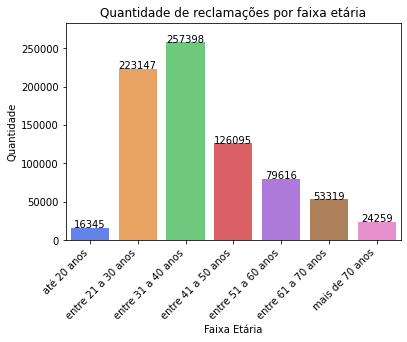

In [17]:
# Gerando o gráfico
sns.barplot(x=faixa_etaria.index, y=faixa_etaria, alpha=0.7, palette='bright')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Faixa Etária')
ax.set_xticklabels(faixa_etaria.index, rotation=45, horizontalalignment='right')
ax.set_ylabel(ylabel='Quantidade')
ax.set_title(label='Quantidade de reclamações por faixa etária')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
y_max = faixa_etaria.max() * 1.1
ax.set_ylim([0, y_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center')
# Exibindo o gráfico
plt.show()

## ***Qual a reclamação mais comum?***

In [18]:
grupo_problema = dados_consumidor['Grupo Problema'].value_counts()

In [19]:
print('Quantidade de reclamações por grupo de problema:')
print(grupo_problema)

Quantidade de reclamações por grupo de problema:
Cobrança / Contestação    336623
Contrato / Oferta         145611
Vício de Qualidade        109555
Atendimento / SAC          92611
Informação                 58817
Entrega do Produto         32942
Saúde e Segurança           4020
Name: Grupo Problema, dtype: int64


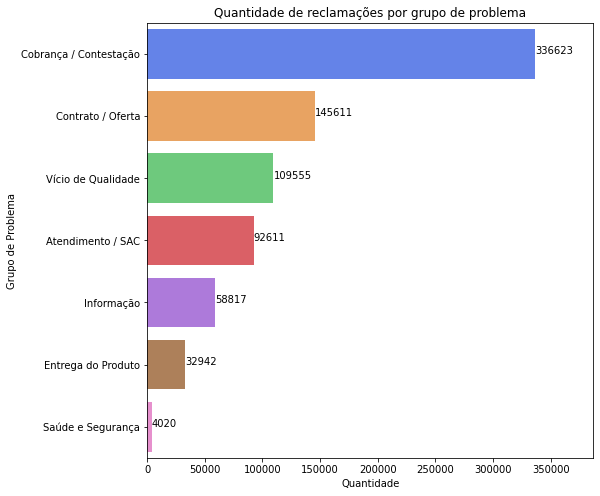

In [20]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=grupo_problema, y=grupo_problema.index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Grupo de Problema')
ax.set_title(label='Quantidade de reclamações por grupo de problema')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = grupo_problema.max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Quais segmentos de mercado possuem mais reclamações?***

In [21]:
segmento_mercado = dados_consumidor['Segmento de Mercado'].value_counts()

In [22]:
print('Quantidade de reclamações por segmento de mercado:')
print(segmento_mercado)

Quantidade de reclamações por segmento de mercado:
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    287507
Bancos, Financeiras e Administradoras de Cartão                            189849
Comércio Eletrônico                                                         63921
Bancos de Dados e Cadastros de Consumidores                                 50817
Transporte Aéreo                                                            47674
Empresas de Intermediação de Serviços / Negócios                            29512
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       17578
Empresas de Pagamento Eletrônico                                            15804
Energia Elétrica                                                            11890
Programas de Fidelidade                                                     10751
Corretoras e Sociedades de Seguros, Capitalização e Previdência              8784
Agências de Viagens                            

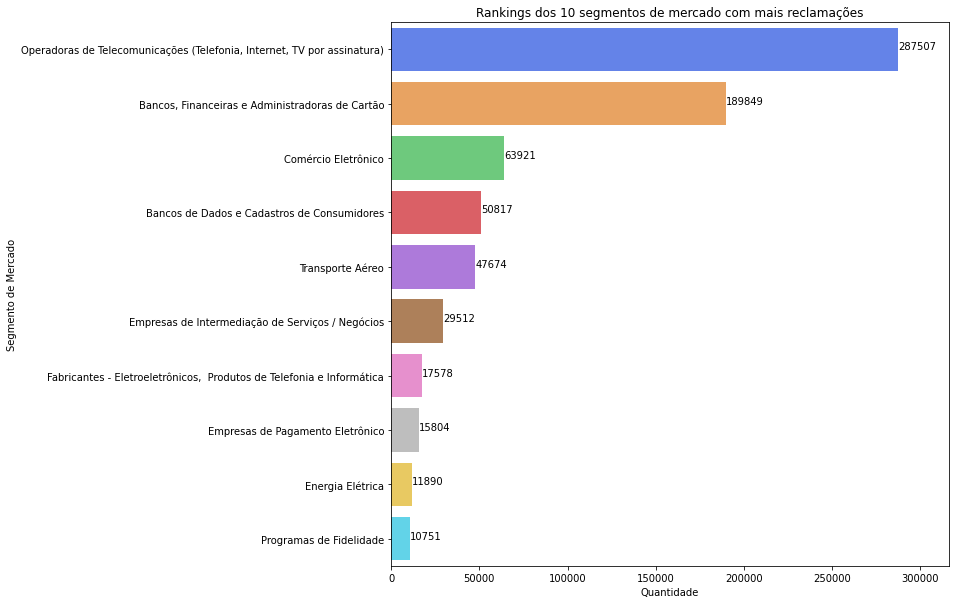

In [23]:
# Gerando o gráfico
plt.figure(figsize=(10,10))
sns.barplot(x=segmento_mercado[:10], y=segmento_mercado[:10].index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Segmento de Mercado')
ax.set_title(label='Rankings dos 10 segmentos de mercado com mais reclamações')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = segmento_mercado.max() * 1.1
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Quais os grupos de problemas que mais afetaram o segmento com mais reclamações?***

In [24]:
grupos_segmento = dados_consumidor[dados_consumidor['Segmento de Mercado'] == 'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)']
grupos_segmento = dados_consumidor['Grupo Problema'].value_counts()

In [25]:
print('No segmento de mercado de Operadoras de Telecomunicações, as quantidade de reclamações por grupo de problemas foram:')
print(grupos_segmento)

No segmento de mercado de Operadoras de Telecomunicações, as quantidade de reclamações por grupo de problemas foram:
Cobrança / Contestação    336623
Contrato / Oferta         145611
Vício de Qualidade        109555
Atendimento / SAC          92611
Informação                 58817
Entrega do Produto         32942
Saúde e Segurança           4020
Name: Grupo Problema, dtype: int64


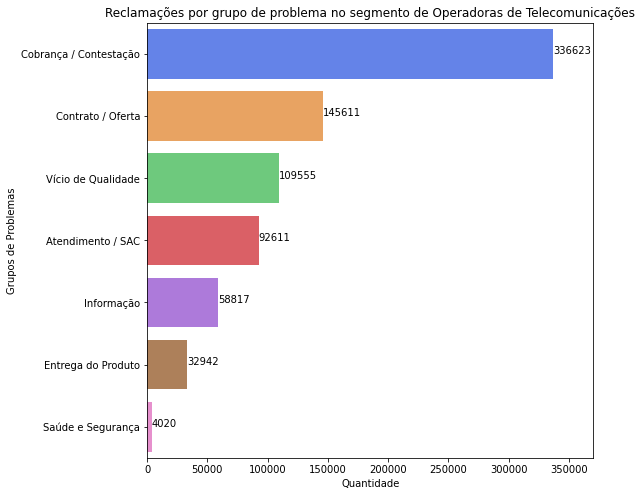

In [26]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=grupos_segmento, y=grupos_segmento.index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Grupos de Problemas')
ax.set_title(label='Reclamações por grupo de problema no segmento de Operadoras de Telecomunicações')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = grupos_segmento.max() * 1.1
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Quais as empresas desse segmento que apresentam mais reclamações do grupo de problemas mais comum?***

In [27]:
empresas = dados_consumidor[dados_consumidor['Segmento de Mercado'] == 'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)']
empresas = empresas[empresas['Grupo Problema'] == 'Cobrança / Contestação']
empresas = empresas['Nome Fantasia'].value_counts()

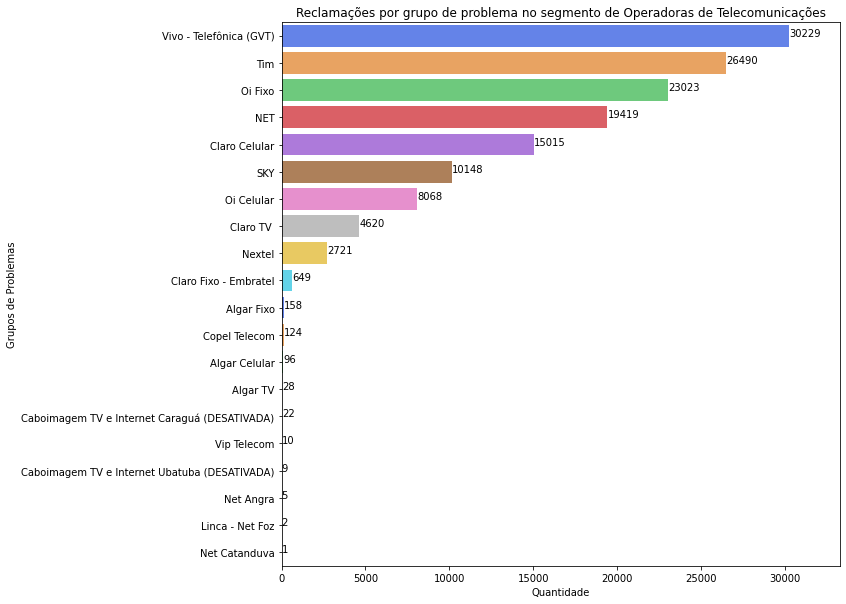

In [28]:
# Gerando o gráfico
plt.figure(figsize=(10,10))
sns.barplot(x=empresas, y=empresas.index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Grupos de Problemas')
ax.set_title(label='Reclamações por grupo de problema no segmento de Operadoras de Telecomunicações')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = empresas.max() * 1.1
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Existe alguma relação entre o tempo de resposta e a nota do consumidor?***

In [29]:
correlacao = dados_consumidor[['Tempo Resposta', 'Nota do Consumidor']].corr()
correlacao

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.050719
Nota do Consumidor,-0.050719,1.000000


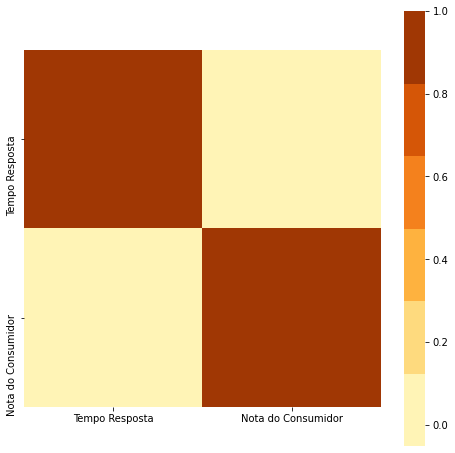

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data = correlacao, cmap=sns.color_palette("YlOrBr"), square=True);

## ***Qual a proporção de reclamações registradas e não resolvidas?***

In [31]:
print('Reclamações registradas: ' + str(len(dados_consumidor['Avaliação Reclamação'])))
print('Reclamações resolvidas: ' + str(len(dados_consumidor[dados_consumidor['Avaliação Reclamação'] == 'Não Resolvida'])))

Reclamações registradas: 780179
Reclamações resolvidas: 150522


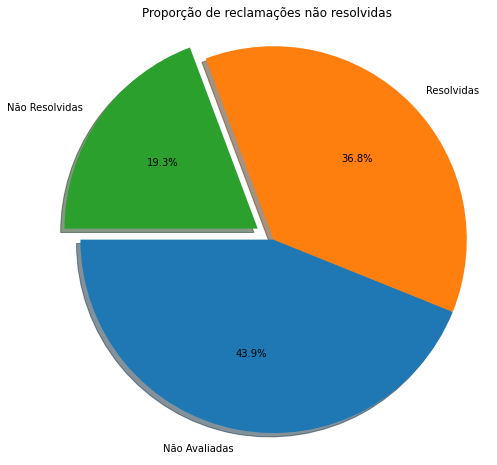

In [32]:
reclamacoes = dados_consumidor['Avaliação Reclamação'].value_counts()
labels = ['Não Avaliadas', 'Resolvidas', 'Não Resolvidas']
explode = (0, 0, 0.1) 
plt.figure(figsize=(8,8))
plt.pie(reclamacoes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
plt.axis('equal')
plt.title('Proporção de reclamações não resolvidas')
plt.show()

### ***Para os 10 segmentos de mercado com mais reclamações, qual é essa proporção?***

In [33]:
reclamacoes = dados_consumidor['Segmento de Mercado'].value_counts()
reclamacoes = reclamacoes[0:10].sort_index()

In [34]:
df = dados_consumidor[dados_consumidor['Segmento de Mercado'].isin(reclamacoes.index)]
df = df[df['Avaliação Reclamação']=='Não Resolvida']
nao_resolvidas = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

In [35]:
df = dados_consumidor[dados_consumidor['Segmento de Mercado'].isin(reclamacoes.index)]
df = df[df['Avaliação Reclamação']=='Não Avaliada']
nao_avaliadas = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

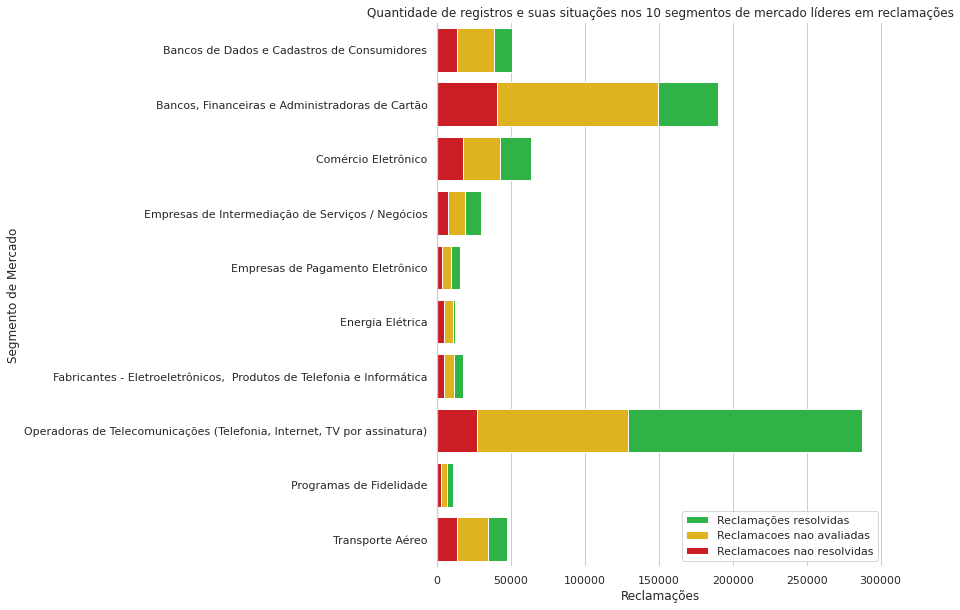

In [36]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 10))
sns.set_color_codes('bright')
sns.barplot(x=reclamacoes.values, y=reclamacoes.index, label='Reclamações resolvidas', color='g')
sns.barplot(x=nao_resolvidas.values + nao_avaliadas.values, y=nao_resolvidas.index, label='Reclamacoes nao avaliadas', color='y')
sns.barplot(x=nao_resolvidas.values, y=nao_resolvidas.index, label='Reclamacoes nao resolvidas', color='r')
ax = plt.gca()
ax.legend(ncol=1, loc='lower right', frameon=True)
ax.set(ylabel='Segmento de Mercado', xlabel='Reclamações', title = 'Quantidade de registros e suas situações nos 10 segmentos de mercado líderes em reclamações')
sns.despine(left=False, bottom=True)

## ***As compras/contratações realizadas por meio eletrônico geraram mais reclamações que as compras feitas em meios físicos?***

In [37]:
forma_compra = dados_consumidor['Como Comprou Contratou'].value_counts()

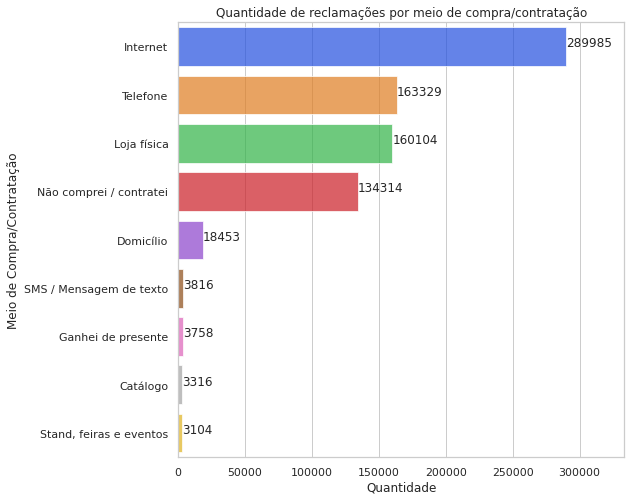

In [38]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=forma_compra, y=forma_compra.index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Meio de Compra/Contratação')
ax.set_title(label='Quantidade de reclamações por meio de compra/contratação')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = forma_compra.max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
      ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Existe alguma época do ano em que há uma concentração de reclamações?***

In [39]:
dados_consumidor['Mês'] = dados_consumidor['Data Finalização'].dt.month

In [40]:
datas = dados_consumidor['Mês'].value_counts()

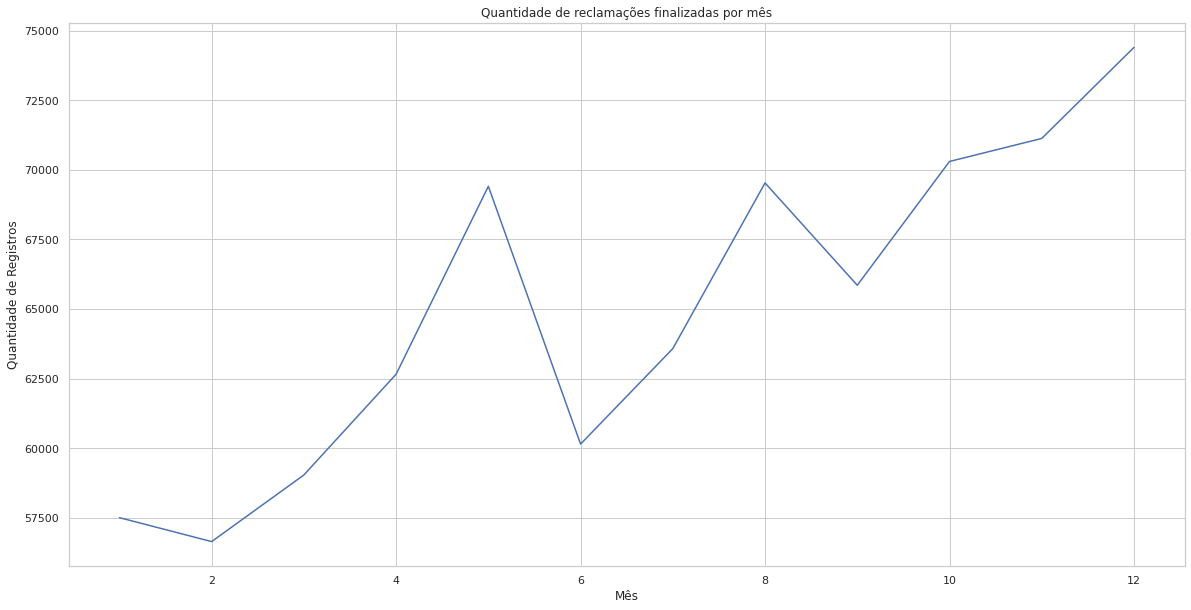

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(x=datas.index, y = datas.values)
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Mês')
ax.set_ylabel(ylabel='Quantidade de Registros')
ax.set_title(label='Quantidade de reclamações finalizadas por mês')
# Exibindo o gráfico
plt.show()